# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [5]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [6]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

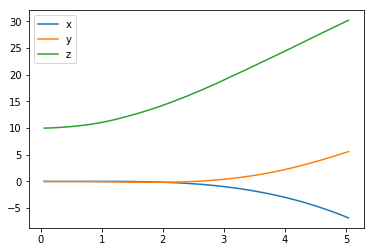

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

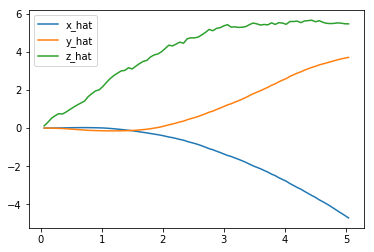

In [8]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

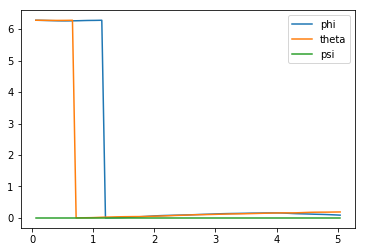

In [9]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

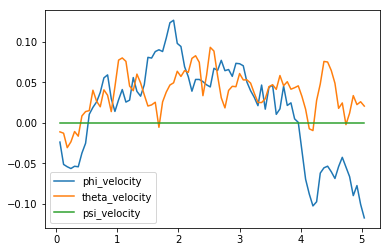

In [10]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

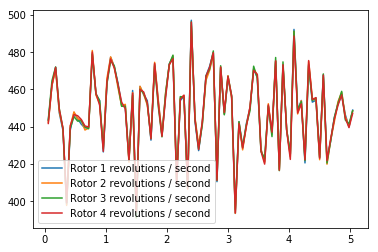

In [11]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [12]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-6.83564781  5.59976682 30.22011553  0.0877092   0.18917402  0.        ]
[-4.71815138  3.71579036  5.47476819]
[-0.11698123  0.02058069  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [13]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.838 (best =   0.090), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [38]:
from agents.agent import DDPG
import numpy as np
import sys

In [39]:
## import taskes
from custom_tasks.hover import hover

In [40]:
## Setting up parameters and declaring agent
num_episodes = 1000
init_pose = np.array([1., 1., 1., 0., 0., 0.])
target_pos = np.array([1., 1., 1.])
task = hover(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task) 

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
plot_data = {x : [] for x in ['episode', 'total_reward']}


In [41]:
## TODO: Train your agent here.


## initializing list to store reward per episode
## will be used to plot the change in reward with episodes later
reward_x = []
reward_y = []
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = {x : [] for x in labels}
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action=action, reward=reward, next_state=next_state, done=done)
        state = next_state
        
        
        descp_entry = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action) 
        
        for i_count in range(len(labels)):
            results[labels[i_count]].append(descp_entry[i_count])
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="") 
            reward_x.append(i_episode)
            reward_y.append(agent.total_reward)

            break
    sys.stdout.flush()

Episode = 1000, score = -58.898 (best =  -0.064), noise_scale = 0.11

In [50]:
## printing rewards for the last 10 episodes
for i in range(1, 11):
    print ("Episode: {} with reward {}".format(reward_x[-i],reward_y[-i]))
print ("The mean total reward for the last 10 episodes is " + str(np.mean(reward_y[-10:])))
print ("The std total reward for the last 10 episodes is " + str(np.std(reward_y[-10:])))

Episode: 1000 with reward -765.6796342242222
Episode: 999 with reward -1002.761600119431
Episode: 998 with reward -856.2571557180532
Episode: 997 with reward -775.0076622148855
Episode: 996 with reward -839.9588639904741
Episode: 995 with reward -1000.2968485266016
Episode: 994 with reward -1001.8448705255655
Episode: 993 with reward -998.2169203297068
Episode: 992 with reward -774.7609685992013
Episode: 991 with reward -1002.7317287298114
The mean total reward for the last 10 episodes is -901.7516252977952
The std total reward for the last 10 episodes is 102.97072697781542


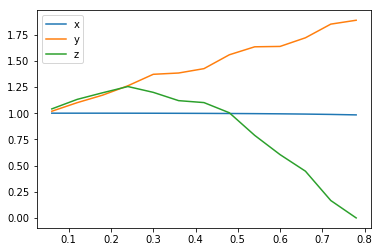

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

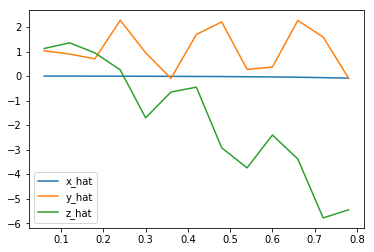

In [45]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

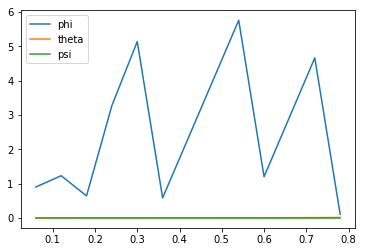

In [46]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

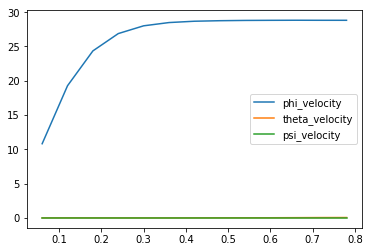

In [47]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

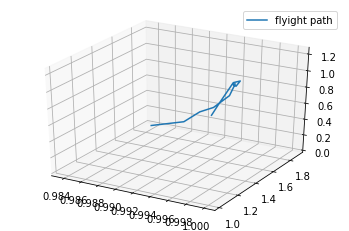

In [48]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(results['x'], results['y'], results['z'], label='flyight path')
ax.legend()

plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

No handles with labels found to put in legend.


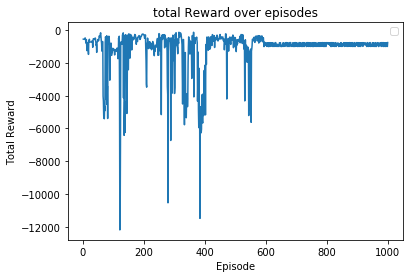

In [49]:
## TODO: Plot the rewards
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(reward_x, reward_y)
plt.title("total Reward over episodes")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:  
The predescribed task was of takeoff where the initial positio was origin and the target was to reach [0,0,10].  

I decided to implement the hover task where the inital position was [1,1,1] and the final position was also [1,1,1] code for which can be found in custom_tasks/hover  
- The task that I decided was to make the quadcopter hover over the given coordinates, in the example above the start and the target of coordinates are [1,1,1].  
- In order to design the reward function, I initially started with the same award function as in policy_search.py file however the model diverged and was giving outputs.
- One For The inspection of the euler angles and the angular velocity it was concluded that these terms should also have a say in deciding reward as the quadcopter needs to stay stationery in one place

##### After a lot of trial and error the final award function was created

- The general idea behind the reward function was to penalize the agent as it moves away from the target this was done linearly and since we don't want the quadcopter to move and to roll angular velocity, translational velocity, and euler angles were penalized as they move away from zero.
- This resulted in a challenging situation as when the quadcopter starts in mid air it drops to combat this we need to add velocity in the set direction but the velocity also needs to be penalised otherwise the quadcopter may move away from the target
- This may happen in any direction during an episode
- So for all velocities and the Euler  angles,  when the agent has taken on wrong action and has moved away from the target these parameters be allowed to change more easily to incorporate this An exponential decay function was used to give a scaling factor for velocities and the euler angles
- When we are close to the target the above mentioned parameters are penalised heavily and as we move away from the target the penalty is reduced.







**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:  
I tried Deep Deterministic Policy Gradients (DDPG) algorithm, it's recommended in this project that it fits continous action spaces, it is a kind of actor-critic model.  
**Hyperparameters:**  
$\gamma$ is 0.95, $\tau$ is 0.01  
All hyperparameters are the same ones provided within DDPG's original paper implementation.   
For the task I changed the runtime to 10 from the default 5 so as to allow my model to recover in case of a bad action was taken.  

**Neural Network Architecture :**  

_Actor_:
- Actor model has 3 dense layers
- 32, 64, 32 units respectively
- All with relu activation function. 
- Dropout layers have been added between the 3 layers making the final model of 5 layers before the final layer with 4 nodes and sigmoid activation.  

_Critic_:
- The Critic model has states net which has 2 dense layers(32, 64)
- Actions net which has 2 dense layers(32, 64)
- All of layers have relu activation function and a third dropout layer has been added between the tow layers.
- Both the layers are combined and another 32 unit dense layer is added before the final layer with 1 nodes and sigmoid activation.  


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:  
Intuitively speaking it feels like the easiest task to do we just have to keep all the four rotors at the same speed and make sure that the Z coordinates is maintained.    

The agent seem to attain stablity at around 600th, (The Aha Moment) so seems to be a diffucumt task for the agent

Observing the rewards plot one can see that the best score is obtained right at the start as the model starts at target position.  
followed by which there is a learning curve present the model seems to not learn much till around episode 600 but then it manages to keep a consistent total reward of nearly -900 after 600th episode

I was satisfied with the final peformance of the agent as during the numerous tries prior the agent used to diverge so easily.
The final performance looks like stable, however, multiple runs of the training leads to different results where the agent performance oscillate between success and failure at the final episodes.

The rewards seem to stabelize at around -900 per episode in the end.
The mean of total reward for the last 10 episodes comes out to be -900 with a std of nearly -100


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

In one line it was a **humbling experience** working on this project

The hardest part for me watch definitely defining the task and understanding how the training process works
Initially I was clueless as to why my model was diverging and I found it very helpful to plot the flight path, velocities euler, angles, to fine tune the award function.

I had to rerun the model many times to find the exact constants for the reward function

In order to allow my model to somewhat converge I had to add the following lines of code in my step function

```python
        if abs(self.sim.pose[:3]-self.target_pos).sum() > 30:
            reward -= 50
            done = True

```

The above lines ensure that in case a very bad non recoverable action is taken then the episode terminates immediately with huge penalty associated with it
Without this the problem becomes more of a translational problem then a hovering problem once a bad action is performed, by the agent.

Even after hours and hours of trial and error my model still is not able to maintain its Z co-ordinate perfectly
The possible reason may be the following

The reason behind divergence is that once the quadcopter sways away from the target (as it does initially) it attains some velocity in some direction with which it also gains momentum.   
  As per the reward function we counter this velocity only after the model has moved away from the target and while coming back to target the quadcopter now have momentum in the opposite direction but since we are close to the equilibrium we again cannot cancel this momentum so the the quadcopter goes in the opposite direction this cycle continuous and the reward oscillates between two values.  Over the episode this effects leads to divergence.
I believe this to be the explanation that one of the three axis cannot reach equilibrium

#### Further Improvement

I believe that the agent is capable of learning the our task and major improvements can be achieved by modifying the reward function to account for the initial dive that the quadcopter tskes. and to counter act the momentum.

Some other possible changes are 
- Increasing the runtime value so as to allow the agent 2 come back to target
- To terminate episodes more aggressively when a bad action is taken

Changing the hyperparameters, implement different neural network architectures, or modifying the reward function might also lead to maintain stability.